# LDAMark

This notebook shows how to compare two different Latent Dirichlet Allocation (LDA) modeler implementations using LDAMark software. The LDA model posits that text documents are composed of various topics that form a distribution over the document in its entirity [2]. This distribution of topics, otherwise known as a "topic probability," can be used to represent the document as well as compare it to others. By expanding on the LDA model, not only can texts within corpora be defined and organized, but corpora as whole units may be described in similar terms of topic distributions and probabilities. As technologies and tools are being developed to perform these types of analyses over raw information, the ability to analyze and asses the performance of these tools is essential to developing more effecient and capable systems.

The best way to perform a comparative analysis is through benchmarking. Benchmarking, in terms of software algorithmic design, is the execution and timing of code, analysis of time usage, and reduction of runtime through optimization. A comparative benchmark would involve the running of corresponding pieces of code among two or more programs in order to compare their efficiency at dealing with identical tasks. In order to efficiently test and compare LDA topic modelers, a prototype script was designed to run a given topic modeler with given parameters and output a runtime analysis to a log for comparison. This script, _benchmark.py_ (discussed in more detail below), was designed to perform analyses for two LDA topic modelers, VSM and MALLET.

## VSM vs MALLET

Two prominent LDA-Topic modeler implementations are VSM, which stands for Vector Space Model, and MALLET (MAchine Learning for LanguagE Toolkit). VSM is Python-based and was developed by the Indiana Philosophical Ontology (InPhO) Project, and as the documentation (http://inpho.github.io/vsm/) explains:

    The vsm module provides tools and a workflow for producing semantic models of textual corpora and analyzing and visualizing these models.
    
MALLET was developed by a team of graduate students at the University of Massachusetts Amherst [1]. It was designed as a "Java-based package for statistical natural language processing, document classification, clustering, topic modeling, information extraction, and other machine learning applications to text" [1]. 

Essentially, both seek to provide methods and tools for analyzing and comparing raw text in hopes of ultimately improving the ways by which people navigate, search for, and relate information. When analyzing corpora, the modelers usually search for a predefined number of topics running through a predetermined number of iterations in order to build the topics. Both modelers have an intialization (init) stage and a training (train) stage. During the initialization stage, the given corpus is loaded and prepared for analysis. The training stage involves actually iterating through document and text in order to build a model. 

The key difference between VSM and MALLET, besides the fact that one is Python based and the other is Java based, is that the init stage in MALLET is one stage, whereas in VSM, the init stage is two stages: initialization and preparation (prep). MALLET's init and VSM's init and prep do essentially the same tasks, but it is important to note the structural differences between softwares. 

## benchmark.py

As mentioned above, *benchmark.py* is a script designed to output analytical runtime information concerning LDA Topic Modeler implementations. The two implementations currently supported for benchmarking are VSM and MALLET. *benchmark.py* takes command line arguments that provide the basic parameters by which to run the topic modeler to be analyzed. Within the script, the modeler is run with the given parameters and it is timed using built-in Linux timing functions. The timing data is output to a specified file that may hold the data of several iterations. Information on analyzing the data within this *log* file is below.

The script currently treats both modelers, VSM and MALLET, as each having the same two components, an *init* and a *train* component. These components may be tested separately, but <b>in order to run the *train* component, the *init* component for the corresponding modeler must be run beforehand with the same parameters.</b> As mentioned above, VSM's *init* function is broken into *init* and *prep* steps in reality - *benchmark.py* combines these two steps for the sake of consistency during comparison.

The *benchmark.py* script was developed by the InPhO team - It may be downloaded from the following GitHub repository:

    git@github.com:inpho/ldamark.git
    
Installation requires opening the containing directory and running the following command:

    Python setup.py
    
The above command will install any required packages including VSM and MALLET.

Running *ldamark --h* on the command line will then show the help text with information on what parameters to provide and how to give them to the function. The following is what the help text should look like:

    usage: benchmark.py [-h] --topics TOPICS [--iterations ITERATIONS] [--log LOG]
                        --m {vsm,mallet} [--f {init,train}]
                        corpus

    positional arguments:
      corpus                Path to corpus

    optional arguments:
      -h, --help            show this help message and exit
      --topics TOPICS       Number of topics
      --iterations ITERATIONS
                            Number of iterations
      --log LOG             Path to log file
      --m {vsm,mallet}      Topic-Modeler to run (hypershelf or mallet)
      --f {init,train}      Function to run (init or train)
      
For example, in order to run an analysis on the training of a corpus of data in the local */home/me/mycorpus* directory using MALLET searching for 50 topics and running through 100 iterations, the command to run would look like:

    ldamark /home/me/mycorpus --m mallet --f train --iterations 100 --topics 50
    
<b> It is important to note that in order to run the above command succesfully, the corpus must be initialized</b> (preferably with the given parameters). <b>A corpus cannot be trained before it has been initialized</b> An example of running the initialization for the same corpus is below:

    ldamark /home/me/mycorpus --m mallet --f init --iterations 100 --topics 50
    
To store data in a specific log file, the log file must be explicity given to _ldamark_. Otherwise, _ldamark_ will create its own log file in its own directory. Anytime a log file is not specified, the script will append data to its own log file (which is accessible to the user). If a log file is specified, data will be appended to it. For example, to specify output to a log file located at */home/me/mylog.csv:

    ldamark /home/me/mycorpus --m mallet --f train --iterations 100 --topics 50 --log /home/me/mylog.csv

As observed, the _benchmark.py_ script functions as a simple tool designed for a simple purpose: timing programs. 

# Log Analysis via Pandas and MatPlotLib

The Python Pandas library allows users to effeciently and effectively manage data without making them do the tedious work of reorganizing, classifying, and building data structures.

MatPlotLib is another powerful library for conveniently and easiliy plotting and visualizing data.

Pandas is an excellent library for analyzing the _log_ file built by _benchmark.py_. After several tests, a good set of data will be built up in the log file. Users might even consider creating multiple log files specific to certain types of tests. The following code and functions are easily adjustable to a user's specific needs. 

Below is an example of how a log file could be loaded and manipulated using Panda before being visualized with MatPlotLib. The code is clean and straightforward with the output directly below. 

In [113]:
import pandas as pd
import numpy as np

# Input appropriate log file to use for data
# Ensure log file is in same directory as notebook
benchmarks = pd.read_csv('log.csv')

#To view benchmarks DataFrame
benchmarks

,implementation,method,corpus,topics,iterations,real,user,system
0,vsm,import,BJPS,NaN,NaN,17.6,17.84,3.76
1,mallet,import,BJPS,NaN,NaN,0.7,1.02,0.10
2,vsm,train,BJPS,5,200,11.3,6.15,2.08
3,mallet,train,BJPS,5,200,7.0,8.46,0.15
4,vsm,train,BJPS,25,200,14.4,9.45,1.97
5,mallet,train,BJPS,25,200,8.4,9.64,0.20
6,vsm,train,BJPS,50,200,18.1,12.94,2.19
7,mallet,train,BJPS,50,200,9.2,10.98,0.17
8,vsm,train,BJPS,100,200,25.9,20.72,2.16
9,mallet,train,BJPS,100,200,9.6,11.26,0.19


In [ ]:
%pylab inline

corpuses = benchmarks['corpus'].unique()
implementations = benchmarks['implementation'].unique()
method = benchmarks['method'].unique()


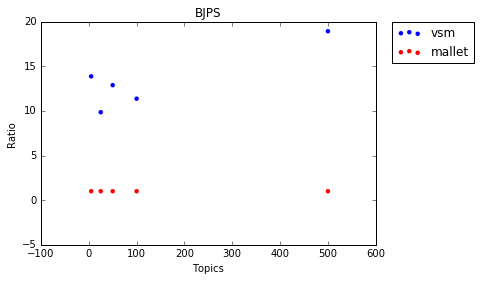

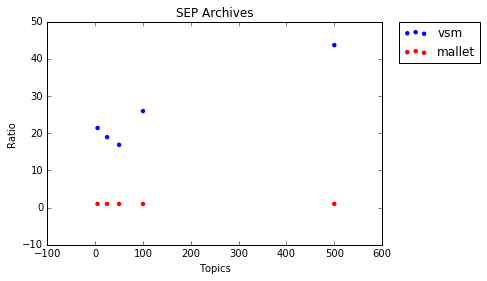

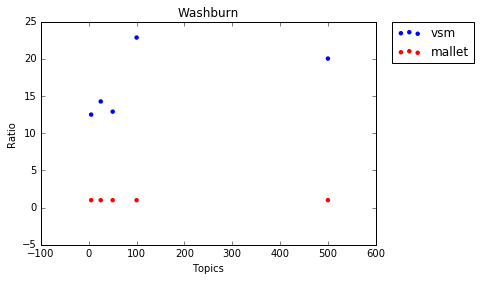

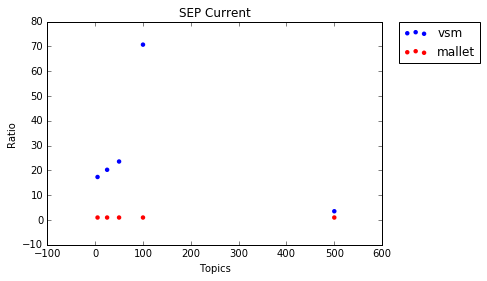

In [111]:
#for each corpus, plot series of time (or time ratio) vs topic number

def chart(corpuses, implementations, ratio=None):
# Builds a chart for each corpus displaying unique data points for each implementation
# Displays ratios with given ratio as baseline, otherwise raw time is shown if ratio is None

    for corpus in corpuses:
        for implementation in implementations:
            y = benchmarks[benchmarks.corpus == corpus][benchmarks.implementation == implementation].system
            x = benchmarks[benchmarks.corpus == corpus][benchmarks.implementation == implementation].topics

            if ratio is not None:
                base = benchmarks[benchmarks.corpus == corpus][benchmarks.implementation == ratio].system
                y = np.array(y)
                base = np.array(base)
                y = y/base

            if implementation == 'vsm':
                c = 'b'
            else:
                c = 'r'

            scatter(x, y, c=c, edgecolor='none', label=implementation)

        title(corpus)
        legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        xlabel('Topics')
        if ratio is None:
            ylabel('Time (s)')
        else:
            ylabel('Ratio')
        show()
   

chart(corpuses, implementations, ratio='mallet')

### Alternate Commands using Pandas 

Commands below are examples using the 'benchmarks' dataset from above.

#### Printing each row of 'system' column for 'corpus' being 'BJPS'
    for i in benchmarks.loc[benchmarks['corpus'] == 'BJPS'].system:
        print i

#### Ultra Chain
By building up or chainging multiple commands, complex results may be obtained. To start out simply, the following code prints the 'corpus' column of the dataset. 

    print benchmarks.corpus

or this will do the same thing:
   
    print benchmarks['corpus']
   
The following prints out every row of the dataset whose 'corpus' column value is equal to 'BJPS'

    #print benchmarks[benchmarks['corpus'] == 'BJPS']

Combining pieces of code, the following will pull out the system column of the data set including rows of data whose corpus value is 'BJPS' and whose implementation value is 'vsm'.

    benchmarks[benchmarks.corpus == 'BJPS'][benchmarks.implementation == 'vsm'].system


# Moving Forward

Analyzing and comparing the runtime of VSM and MALLET over various corpora with various parameters, VSM performed not quite as well as MALLET in terms of speed and efficieny at the time of this publication. Now this could be the result of one or more features. Noted above, the structure of VSM is different than MALLET - software architecture plays an enormous role in how efficiently a task or tasks are executed. However, the runtime of an algorithm does not reflect the substance of that algorithm. The ability and value of a topic modeler must be determined by the user.

The key point to take away is that designing strong, reliable, and efficient algorithms requires testing and comparison. The benchmarking tools described in this notebook mean little if scientists and developers are unwilling to investigate sources of delay or identify areas of improvement. 

LDA modeling promises huge advances in the ability to organize, classify, and utilize raw text. Even text already classified might be reclassified and reanalyzed in hopes of better connecting information and building knowledge. With improved connection, researchers, scientists, and students will have more accessibility to knowledge and learning; they will be able to break through the barriers of resource limitation and scarcity, and they will be able to collaborate in building a web of knowledge never before experienced by mankind.

# Resources

1. Andrew Kachites McCallum.  "MALLET: A Machine Learning for Language Toolkit." http://mallet.cs.umass.edu. 2002.
2. D. M. Blei, A. Y. Ng, M. I. Jordan. "Latent Dirichlet Allocation." *Journal of Machine Learning Research*. vol. 3, pp. 993-1022, Jan. 2003. 
    
